# Applying a Random Forest model for regression

In [5]:
from tqdm.notebook import tqdm

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, PredictionErrorDisplay

## Reading the logaritmic dataset

In [6]:
DATA = pd.read_csv("../Log_FinalData.csv", index_col="Unnamed: 0")
DATA

,log_racePctAsian,log_blackPerCap,log_indianPerCap,log_PctEmplProfServ,log_PctOccupMgmtProf,log_NumImmig,log_PctImmigRec5,log_PctRecImmig8,log_PctHousOwnOcc,log_PctHousNoPhone,log_OwnOccHiQuart,log_RentHighQ,log_PctForeignBorn,log_PopDens,log_PctUsePubTrans,log_racepctblack,log_racePctWhite,log_racePctHisp,log_ViolentCrimesPerPop
0,0.049218,0.120574,0.103804,0.149219,0.181844,0.012837,0.103804,0.033424,0.181844,0.056905,0.071882,0.139879,0.049218,0.100371,0.079181,0.008600,0.278754,0.068186,0.079181
1,0.161368,0.123852,0.064458,0.060698,0.133539,0.004321,0.209515,0.096910,0.093422,0.064458,0.082785,0.146128,0.082785,0.049218,0.161368,0.049218,0.240549,0.029384,0.222716
2,0.068186,0.103804,0.029384,0.110590,0.120574,0.000000,0.025306,0.017033,0.149219,0.167317,0.064458,0.103804,0.056905,0.082785,0.008600,0.173186,0.193125,0.017033,0.155336
3,0.049218,0.143015,0.064458,0.161368,0.143015,0.008600,0.079181,0.045323,0.292256,0.045323,0.075547,0.247973,0.075547,0.143015,0.107210,0.301030,0.033424,0.041393,0.049218
4,0.037426,0.107210,0.000000,0.139879,0.164353,0.000000,0.029384,0.017033,0.271842,0.021189,0.113943,0.139879,0.045323,0.037426,0.008600,0.008600,0.290035,0.021189,0.012837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.049218,0.103804,0.000000,0.225309,0.230449,0.004321,0.149219,0.071882,0.190332,0.029384,0.103804,0.149219,0.086360,0.107210,0.021189,0.041393,0.271842,0.064458,0.037426
1990,0.262451,0.100371,0.071882,0.149219,0.093422,0.021189,0.209515,0.212188,0.086360,0.068186,0.133539,0.206826,0.184691,0.136721,0.079181,0.164353,0.107210,0.120574,0.161368
1991,0.017033,0.096910,0.075547,0.146128,0.120574,0.025306,0.068186,0.045323,0.136721,0.117271,0.110590,0.143015,0.096910,0.120574,0.071882,0.096910,0.227887,0.096910,0.089905
1992,0.086360,0.110590,0.079181,0.195900,0.170262,0.025306,0.164353,0.149219,0.123852,0.041393,0.167317,0.243038,0.161368,0.139879,0.123852,0.025306,0.271842,0.041393,0.075547


## Creating train and test sets for model fitting
70% and 30% of the whole date were considered for the trainining and testing datasets.

In [7]:
X = DATA.drop(["log_ViolentCrimesPerPop"],axis=1).copy()
Y = DATA.log_ViolentCrimesPerPop

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=21)
X_train.size, X_test.size

(25110, 10782)

## Finding the optimum Random Forest Regressor
The optimal Random Forest will be defined as the one that maximizes R2-score given a number of estimators and stablishing the minimum number of samples to split a node and to create a leaf. The depth of any tree in the RF won't be constant.

In [8]:
Results_Nums_SplitLeaf = []
MaxR2 = 0.0
Range_Leaf_Split = range(1, 21)
Range_NumEstimators = range(50, 151, 50)

ProgressBar = tqdm(total = (len(Range_Leaf_Split)**2)*len(Range_NumEstimators))

for NumEstim in Range_NumEstimators:
    for numSplit in Range_Leaf_Split:
        for numLeaf in Range_Leaf_Split:
            RF_Regressor = RandomForestRegressor(n_estimators=NumEstim, min_samples_split=numSplit,
                                                min_samples_leaf=numLeaf, random_state = 42, n_jobs = -1)
            RF_Regressor.fit(X_train, Y_train)
            Y_hat = RF_Regressor.predict(X_test)
            R2_Score = r2_score(Y_test, Y_hat)

            ProgressBar.update(1)            
            if R2_Score > MaxR2:
                MaxR2 = R2_Score
                Opt_Estim = NumEstim
                Opt_SampleSplit = numSplit
                Opt_SampleLeaf = numLeaf


print(f"{Opt_Estim=}")
print(f"{Opt_SampleSplit=}")
print(f"{Opt_SampleLeaf=}")
print(f"{MaxR2=}")

  0%|          | 0/1200 [00:00<?, ?it/s]

Opt_Estim=150
Opt_SampleSplit=16
Opt_SampleLeaf=7
MaxR2=0.6394632920868858


## Using optimal Random Forest model
By exploring different combinations of the previous hyperparameters, it was found two aspects of finding the optimal Random Forest:
- The number of estimators will increase the accuracy of the model but there is suspicion that this will introduce some noise in the predictions and said accuracy will converge to a value
- It is still possible to stablish the number of minimum samples to get a leaf node and the number of samples to split a node.

The values used for the optimal Random Forest will be 150 estimators, 7 samples to get a leaf node and 16 sample minimum to split a node.

In [9]:
RF_Regressor = RandomForestRegressor(n_estimators=Opt_Estim, min_samples_split=Opt_SampleSplit,
                                    min_samples_leaf=Opt_SampleLeaf, random_state = 42, n_jobs = -1)
RF_Regressor.fit(X_train, Y_train)
Y_pred = RF_Regressor.predict(X_test)

## Obtaining scores for Random Forest model

In [10]:
MS2_E_RF = mean_squared_error(Y_test, Y_hat, squared=False)
MA_E_RF = mean_absolute_error(Y_test, Y_hat)
R2_RF = r2_score(Y_test, Y_hat)

print(f"{MS2_E_RF=} ")
print(f"{MA_E_RF=} ")
print(f"{R2_RF=} ")

%store MS2_E_RF
%store MA_E_RF
%store R2_RF

MS2_E_RF=0.04379818140553575 
MA_E_RF=0.032501629803580595 
R2_RF=0.621650338081774 
Stored 'MS2_E_RF' (float64)
Stored 'MA_E_RF' (float64)
Stored 'R2_RF' (float64)


## Visualize Prediction-Error plot

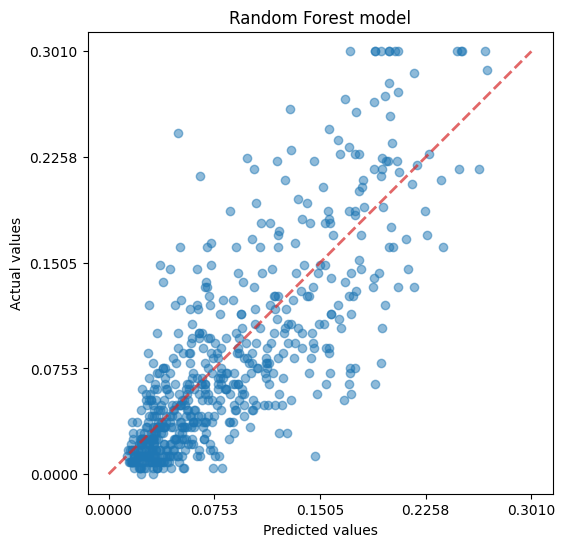

In [11]:
Figura_PredictedReal = plt.figure(1, figsize=(6,6))
Subplot = Figura_PredictedReal.add_subplot(111)
Subplot.set_title("Random Forest model")

PredictionErrorDisplay.from_predictions(y_true=Y_test, y_pred=Y_pred, kind="actual_vs_predicted",
                       scatter_kwargs={"alpha":0.5, "color":"tab:blue"},
                       line_kwargs={"color":"tab:red", "linewidth":2.0},
                       ax = Subplot)

Figura_PredictedReal.savefig("../Resultados/ActualPredicho_RF.png", dpi=300)
plt.show()